In [106]:
## Kmeans
## Violin plot

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv("drug_resp.csv", header = None)
df = df.T

#f1 = df[0].values

In [2]:
concat_cluster = pd.DataFrame()

In [4]:
#Initialize K-means parameters
k_means = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0 )

In [5]:
#run Kmeans
for i in range(0,212):
    drug = df[i].values
    drug_2d = drug.reshape(-1,1)
    k_means.fit(drug_2d)
    Z = k_means.predict(drug_2d)
    concat_cluster[i] = Z
    #print("drug:", i, "\n",Z)    
print(concat_cluster)

    0    1    2    3    4    5    6    7    8    9    ...  202  203  204  205  \
0     0    0    0    0    0    0    1    1    0    1  ...    0    0    1    1   
1     1    0    0    0    0    0    1    0    0    0  ...    0    1    1    1   
2     0    0    0    0    0    0    1    1    0    1  ...    0    1    0    1   
3     1    1    0    1    1    0    1    1    0    0  ...    0    1    1    1   
4     1    1    0    1    1    1    0    1    0    0  ...    0    1    0    0   
5     0    0    0    0    1    1    0    1    1    0  ...    0    1    1    0   
6     1    0    0    0    0    0    1    0    1    0  ...    0    1    0    1   
7     1    0    0    1    0    0    1    0    1    0  ...    1    0    0    0   
8     0    0    0    0    0    0    0    1    1    0  ...    0    1    0    0   
9     0    0    0    0    0    1    0    0    1    0  ...    1    1    1    0   
10    0    1    0    0    0    0    1    1    0    1  ...    0    1    1    1   
11    0    0    0    0    1 

In [107]:
drug_resp_imputed= pd.read_csv('Drug_response_imputed.txt', sep=",")
del drug_resp_imputed['Samples']
drugs_name = pd.DataFrame(list(drug_resp_imputed))
#drugs_name.head()

In [108]:
#drugs_name.iloc[:]

In [96]:
compiled_drugs = pd.DataFrame()
drug1 = pd.DataFrame()
for i in range(0, 20):
    print("Drug", i)
    drug1['IC50'] = df.iloc[:][i] 
    drug1['Label'] = concat_cluster.iloc[:][i]
    drug1['Drug'] = [i] * 43
    drug1 = drug1.sort_values(by ='IC50')
    drug1.reset_index(drop=True,inplace=True)
    compiled_drugs = pd.concat([compiled_drugs, drug1])
    print(compiled_drugs)

Drug 0
        IC50  Label  Drug
0   0.514826      0     0
1   1.805872      0     0
2   2.203266      0     0
3   2.217098      0     0
4   2.307464      0     0
5   2.477620      0     0
6   2.523865      0     0
7   2.831046      0     0
8   3.104154      0     0
9   3.128565      0     0
10  3.264108      0     0
11  3.310774      0     0
12  3.445317      0     0
13  3.445965      0     0
14  3.484741      0     0
15  3.546650      0     0
16  3.649876      0     0
17  3.807214      1     0
18  3.854592      1     0
19  3.926671      1     0
20  4.004764      1     0
21  4.079344      1     0
22  4.081150      1     0
23  4.124367      1     0
24  4.252357      1     0
25  4.307147      1     0
26  4.309470      1     0
27  4.398449      1     0
28  4.466841      1     0
29  4.467157      1     0
30  4.502840      1     0
31  4.739870      1     0
32  4.749104      1     0
33  4.751168      1     0
34  4.852904      1     0
35  5.023082      1     0
36  5.120244      1     0
37  5

In [136]:
compiled_drugs.head(50)

,IC50,Label,Drug
0,0.514826,0,0
1,1.805872,0,0
2,2.203266,0,0
3,2.217098,0,0
4,2.307464,0,0
5,2.477620,0,0
6,2.523865,0,0
7,2.831046,0,0
8,3.104154,0,0
9,3.128565,0,0


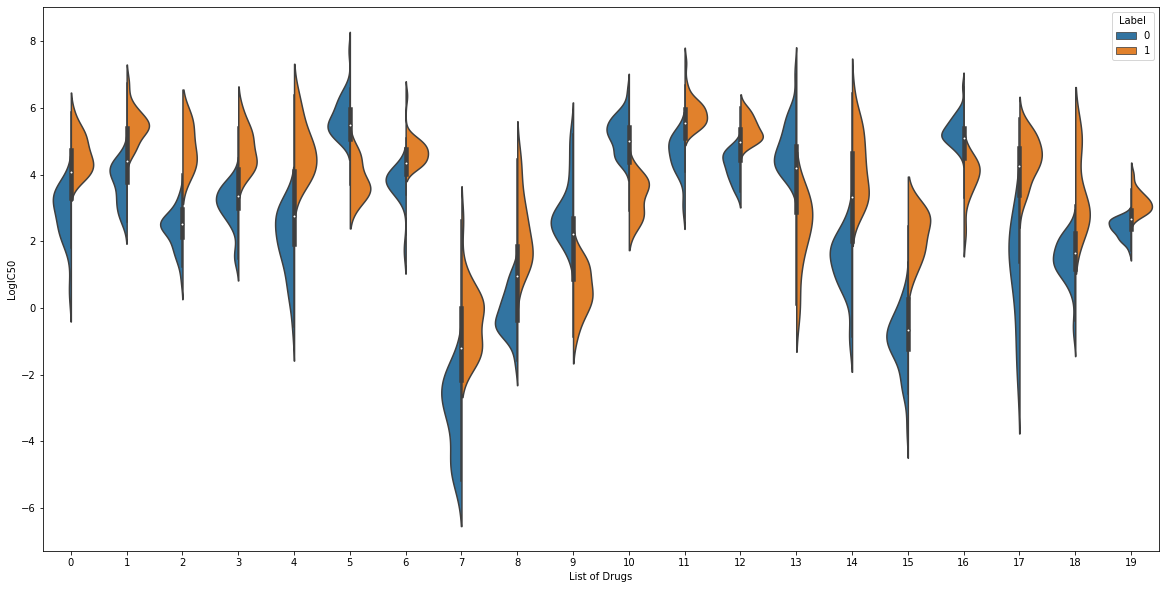

In [135]:
#Violin plot
import seaborn as sns
violin_plot_drugs = plt.figure(figsize=(20,10))
ax = sns.violinplot(x="Drug", y="IC50", hue="Label", data=compiled_drugs, split=True, legend_out = True)
ax.set(xlabel='List of Drugs', ylabel='LogIC50')
# replace labels

violin_plot_drugs.savefig('violin_plot_drugs.svg', format='svg', dpi=1200)

In [122]:
#Use silhouette score
#ange_n_clusters = list (range(2,9))
n_clusters = 2
print ("Number of clusters from 2 to 9: \n", range_n_clusters)

for i in range(0,212):
    drug = df[i].values
    drug_2d = drug.reshape(-1,1)
    clusterer = KMeans (n_clusters=n_clusters).fit(drug_2d)
    preds = clusterer.predict(drug_2d)
    centers = clusterer.cluster_centers_

    score = silhouette_score (drug_2d, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

Number of clusters from 2 to 9: 
 2
For n_clusters = 2, silhouette score is 0.5663205116362263)
For n_clusters = 2, silhouette score is 0.6070747923171464)
For n_clusters = 2, silhouette score is 0.7260681336819703)
For n_clusters = 2, silhouette score is 0.566230853732683)
For n_clusters = 2, silhouette score is 0.5892141381036266)
For n_clusters = 2, silhouette score is 0.6521198154047969)
For n_clusters = 2, silhouette score is 0.5355927710001371)
For n_clusters = 2, silhouette score is 0.5421442545621278)
For n_clusters = 2, silhouette score is 0.5701065474770831)
For n_clusters = 2, silhouette score is 0.593210603949026)
For n_clusters = 2, silhouette score is 0.6337889196987981)
For n_clusters = 2, silhouette score is 0.5638176419326091)
For n_clusters = 2, silhouette score is 0.5590629687612346)
For n_clusters = 2, silhouette score is 0.5891583578232494)
For n_clusters = 2, silhouette score is 0.5868028519979244)
For n_clusters = 2, silhouette score is 0.6865649025188365)
For n_

For n_clusters = 2, silhouette score is 0.512404682982869)
For n_clusters = 2, silhouette score is 0.554528164030686)
For n_clusters = 2, silhouette score is 0.6777274251217655)
For n_clusters = 2, silhouette score is 0.6308066448388004)
For n_clusters = 2, silhouette score is 0.6155511936331148)
For n_clusters = 2, silhouette score is 0.5982889638531784)
For n_clusters = 2, silhouette score is 0.6510018762036589)
For n_clusters = 2, silhouette score is 0.648532956079174)
For n_clusters = 2, silhouette score is 0.5459239191338635)
For n_clusters = 2, silhouette score is 0.5721614176758104)
For n_clusters = 2, silhouette score is 0.5621044492984184)
For n_clusters = 2, silhouette score is 0.5168680270889979)
For n_clusters = 2, silhouette score is 0.6345200671047007)
For n_clusters = 2, silhouette score is 0.5664268630820731)
For n_clusters = 2, silhouette score is 0.6230598719052209)
For n_clusters = 2, silhouette score is 0.8485942840429279)
For n_clusters = 2, silhouette score is 0.6

AttributeError: module 'matplotlib.cm' has no attribute 'spectral'

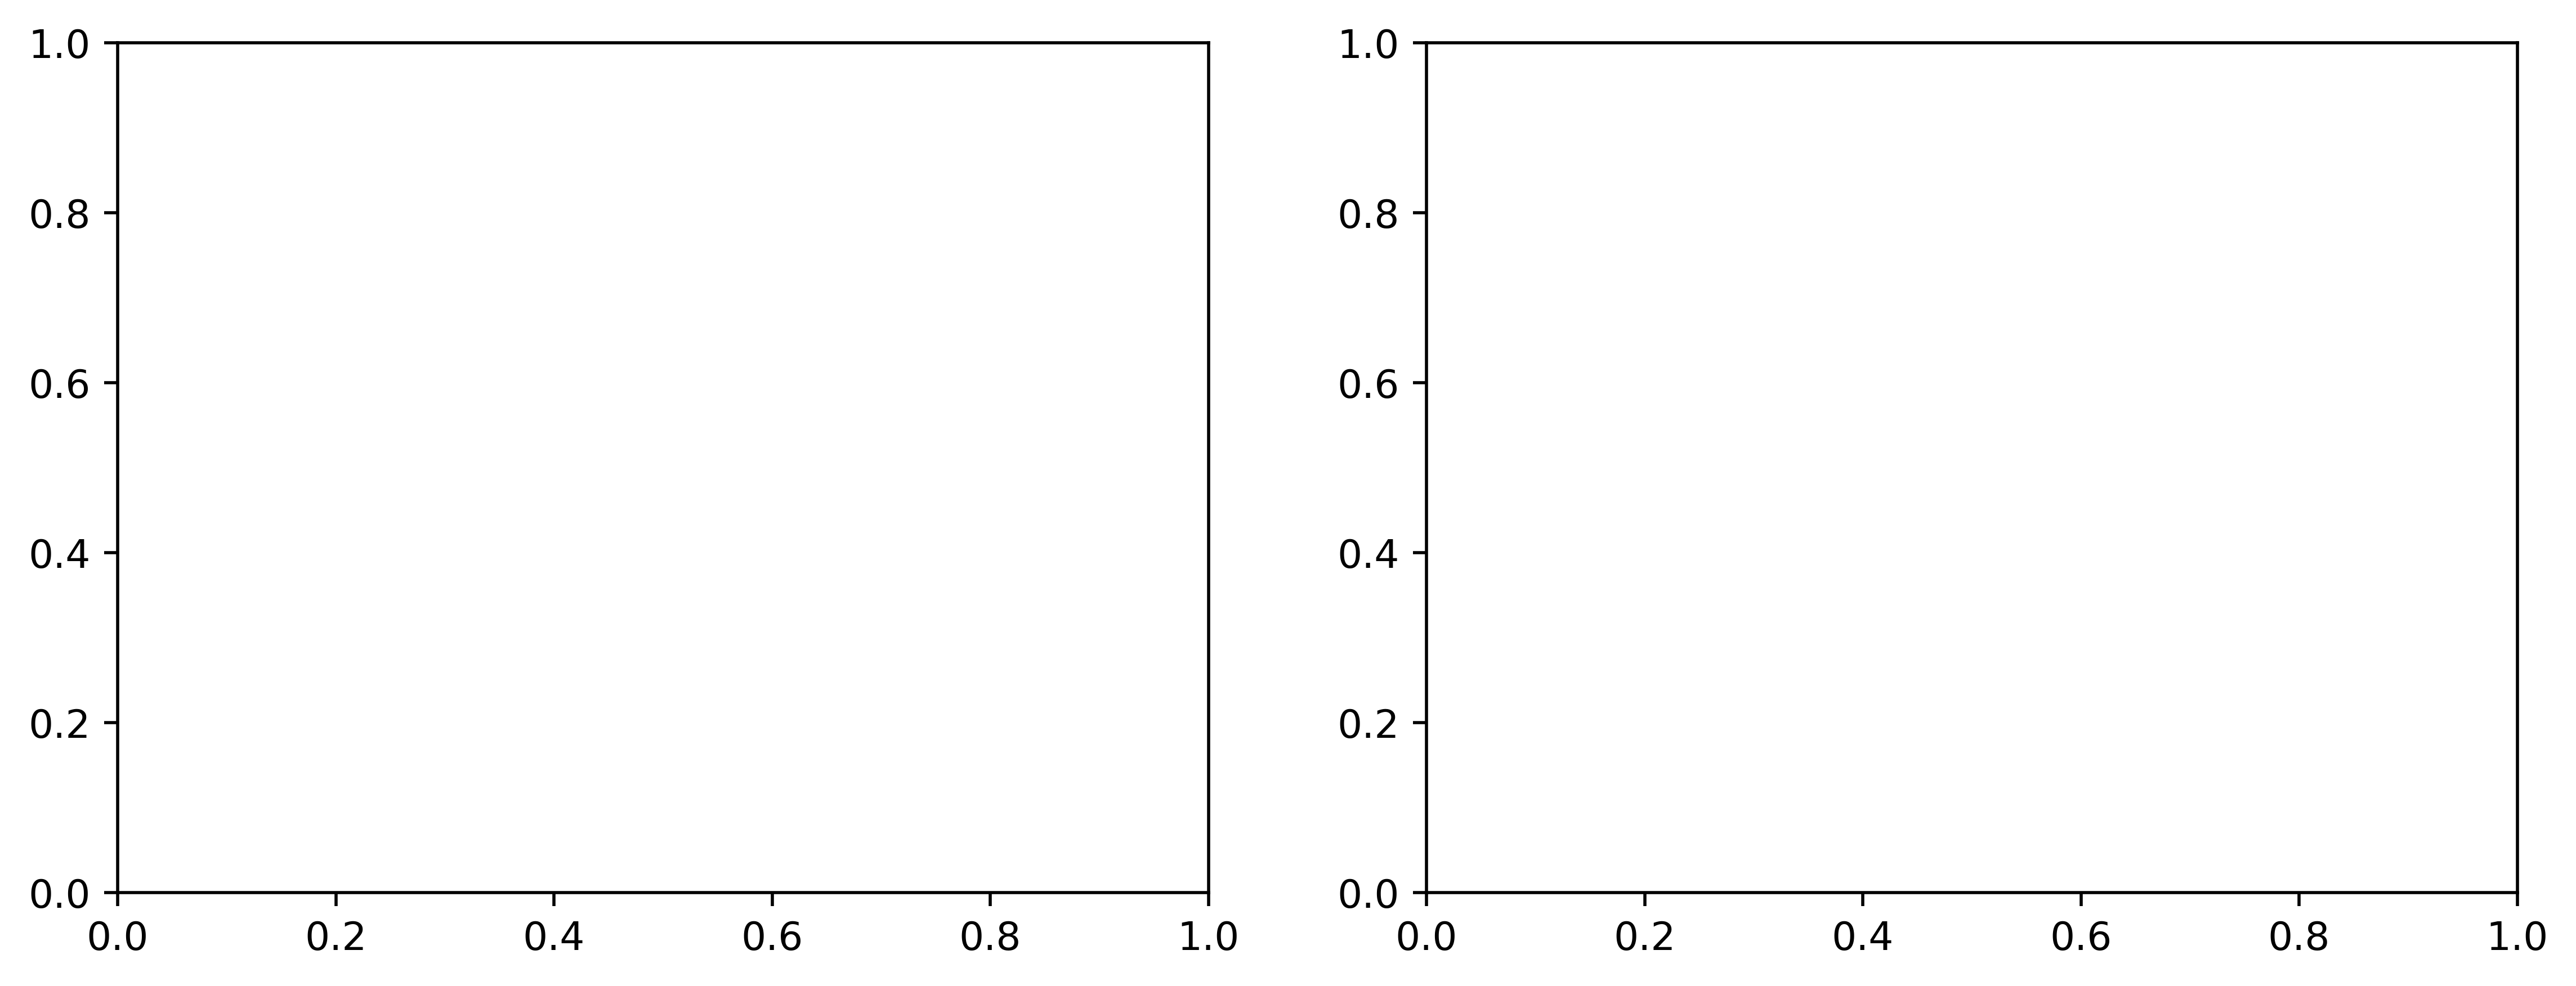

In [132]:
from kmeansplots import kmeans_plot, silhouette_plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4), dpi=500)
ax1 = silhouette_plot(drug_2d, preds, n_clusters=n_clusters, ax=ax1)
ax2 = kmeans_plot(drug_2d, preds, clusterer.cluster_centers_, ax=ax2)


fig.subplots_adjust(top=0.825)
fig.suptitle(("Silhouette Analysis for KMeans Clustering on Iris Data "
              "\n$clusters = {}$".format(n_clusters)),
             fontsize=14, fontweight='bold')

In [ ]:
# Plot each class as a separate colour
n_clusters = 2 
for n in range(n_clusters):
    # Filter data points to plot each in turn.
    ys = f1[ Z==n ]
    xs = [ Z==n ]

    plt.scatter(xs, ys, color=colors[n])

plt.title("Points by cluster")

In [ ]:
drug1 = pd.DataFrame()
drug1['IC50'] = df.iloc[:][0] 
drug1['Label'] = Z
drug1 = drug1.sort_values(by ='IC50')
drug1.reset_index(drop=True,inplace=True)
#print(drug1)
print(drug1.iloc[1][:])